In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/train_hsbc_df - train_hsbc_df.csv')
#shape the data
df.shape

(513643, 10)

In [ ]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C583110837',3',M',28007',M480139044',28007',es_health',44.26,1
1,0,C1332295774',3',M',28007',M480139044',28007',es_health',324.50,1
2,0,C1160421902',3',M',28007',M857378720',28007',es_hotelservices',176.32,1
3,0,C966214713',3',M',28007',M857378720',28007',es_hotelservices',337.41,1
4,0,C1450140987',4',F',28007',M1198415165',28007',es_wellnessandbeauty',220.11,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513643 entries, 0 to 513642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         513643 non-null  int64  
 1   customer     513643 non-null  object 
 2   age          513643 non-null  object 
 3   gender       513643 non-null  object 
 4   zipcodeOri   513643 non-null  object 
 5   merchant     513643 non-null  object 
 6   zipMerchant  513643 non-null  object 
 7   category     513643 non-null  object 
 8   amount       513643 non-null  float64
 9   fraud        513643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 39.2+ MB


In [ ]:
df.isnull().sum()

,0
step,0
customer,0
age,0
gender,0
zipcodeOri,0
merchant,0
zipMerchant,0
category,0
amount,0
fraud,0


In [ ]:
df.describe()

,step,amount,fraud
count,513643.000000,513643.000000,513643.000000
mean,94.992629,37.915481,0.012071
std,51.063474,111.557455,0.109201
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.920000,0.000000
75%,139.000000,42.550000,0.000000
max,179.000000,7665.560000,1.000000


In [ ]:
# Identify columns with object (string) dtype
object_columns = df.select_dtypes(include='object').columns

# Exclude object columns from skewness calculation
numeric_df = df.drop(columns=object_columns)
skewness = numeric_df.skew()

print("Skewness of each column:")
print(skewness)

Skewness of each column:
step      -0.119017
amount    32.196979
fraud      8.936349
dtype: float64


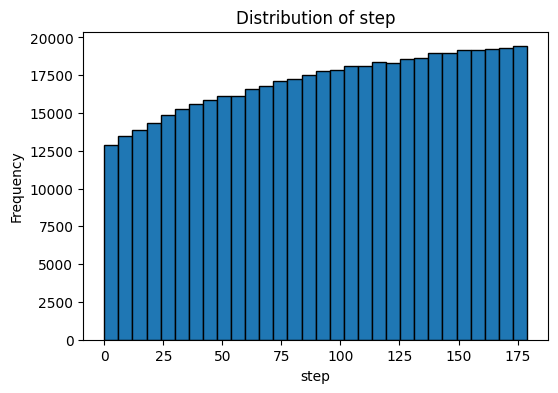

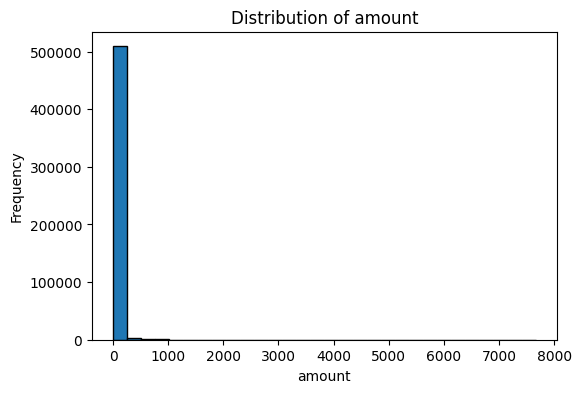

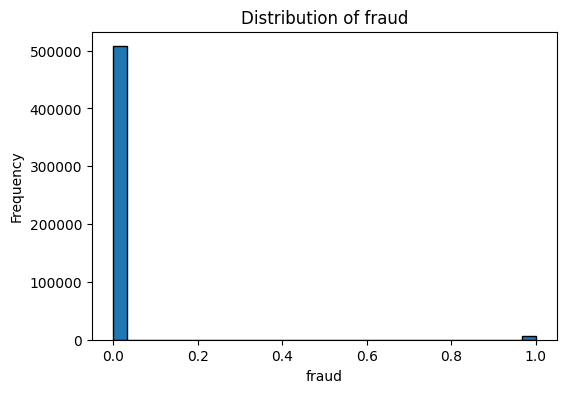

In [ ]:
import matplotlib.pyplot as plt

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6,4))
    plt.hist(df[column], bins=30, edgecolor='k')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Building the Random Forest Model

In [ ]:
print('Number of fraudulent transactions \t: {}'.format(df['fraud'].sum()))
print('Number of non-fraudulent transactions \t: {}'.format(len(df[df['fraud']==0])))



Number of fraudulent transactions 	: 6200
Number of non-fraudulent transactions 	: 507443


Splitting the dataset into training and testing dataset


tringin the dataset on random  forest classifier

In [ ]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/train_hsbc_df - train_hsbc_df.csv')

# Assuming 'fraud' is the target column indicating fraudulent transactions
X = data.drop(columns=['fraud'])  # Features
y = data['fraud']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X and y back together for training and testing sets
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# Save the training and testing sets to CSV files
train_set.to_csv('training_data.csv', index=False)
test_set.to_csv('testing_data.csv', index=False)

print("Training and testing datasets saved as 'training_data.csv' and 'testing_data.csv'.")


Training and testing datasets saved as 'training_data.csv' and 'testing_data.csv'.


Loading the datasets

In [ ]:
import pandas as pd

# Load the training and testing datasets
train_set = pd.read_csv('/content/training_data.csv')
test_set = pd.read_csv('/content/testing_data.csv')

# Separate features and target variable
X_train = train_set.drop(columns=['fraud'])
y_train = train_set['fraud']

X_test = test_set.drop(columns=['fraud'])
y_test = test_set['fraud']


Handle Missing Values and Encode Categorical Variables

In [ ]:
# Handle missing values (if any)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Encode categorical variables if there are any
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure the columns in the test set match those in the training set
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [ ]:
data.isnull().sum()

,0
step,0
customer,0
age,0
gender,0
zipcodeOri,0
merchant,0
zipMerchant,0
category,0
amount,0
fraud,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513643 entries, 0 to 513642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         513643 non-null  int64  
 1   customer     513643 non-null  object 
 2   age          513643 non-null  object 
 3   gender       513643 non-null  object 
 4   zipcodeOri   513643 non-null  object 
 5   merchant     513643 non-null  object 
 6   zipMerchant  513643 non-null  object 
 7   category     513643 non-null  object 
 8   amount       513643 non-null  float64
 9   fraud        513643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 39.2+ MB


In [ ]:
data.describe().round()

,step,amount,fraud
count,513643.0,513643.0,513643.0
mean,95.0,38.0,0.0
std,51.0,112.0,0.0
min,0.0,0.0,0.0
25%,52.0,14.0,0.0
50%,97.0,27.0,0.0
75%,139.0,43.0,0.0
max,179.0,7666.0,1.0


In [ ]:
print ('Non Fraud % ',round(data['fraud'].value_counts()[0]/len(df)*100,2))
print ()
print (round(df.amount[data.fraud == 0].describe(),2))
print ()
print ()
print ('Fraud %    ',round(data['fraud'].value_counts()[1]/len(df)*100,2))
print ()
print (round(data.amount[data.fraud == 1].describe(),2))

Non Fraud %  98.79

count    507443.00
mean         31.86
std          31.34
min           0.00
25%          13.59
50%          26.64
75%          41.92
max        1993.68
Name: amount, dtype: float64


Fraud %     1.21

count    6200.00
mean      533.51
std       837.93
min         0.03
25%       159.72
50%       319.48
75%       554.50
max      7665.56
Name: amount, dtype: float64


Non Fraud %  98.79
Fraud %     1.21


<ipython-input-18-b329690d4a56>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['fraud'].value_counts().index,y=df['fraud'].value_counts(), palette=["C1", "C8"])


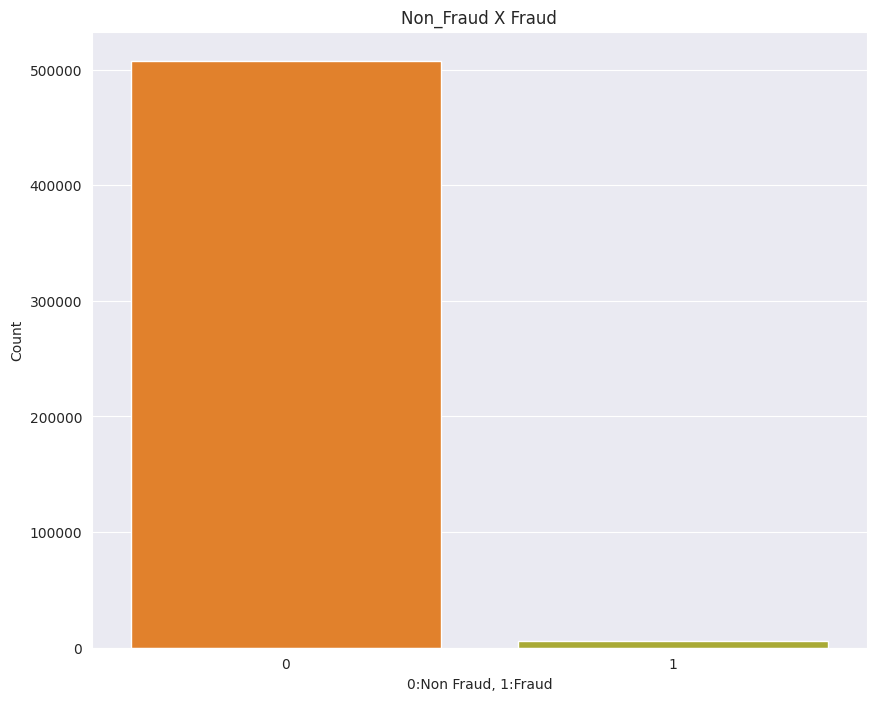

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=df['fraud'].value_counts().index,y=df['fraud'].value_counts(), palette=["C1", "C8"])
plt.title('Non_Fraud X Fraud')
plt.ylabel('Count')
plt.xlabel('0:Non Fraud, 1:Fraud')
print ('Non Fraud % ',round(data['fraud'].value_counts()[0]/len(data)*100,2))
print ('Fraud %    ',round(data['fraud'].value_counts()[1]/len(data)*100,2));

In [ ]:
feature_names = data.iloc[:, 1:30].columns
target = data.iloc[:1, 9:].columns

data_features = data[feature_names]
data_target = data[target]

In [ ]:
feature_names

Index(['customer', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant',
       'category', 'amount', 'fraud'],
      dtype='object')

In [ ]:
target

Index(['fraud'], dtype='object')

In [ ]:
import numpy as np #para funções matemátias básicas

from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target,
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
file_path = '/content/train_hsbc_df - train_hsbc_df.csv'
df = pd.read_csv(file_path)

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# If there are missing values, you might want to fill or drop them
# df = df.dropna()  # Optionally drop rows with missing values

# Assuming 'fraud' is the target variable and others are features
X = df.drop(['fraud'], axis=1)
y = df['fraud']

# Identify and drop non-numeric columns (e.g., customer ID)
non_numeric_columns = X.select_dtypes(exclude=['float64', 'int64']).columns
X = X.drop(columns=non_numeric_columns)  # Drop non-numeric columns

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Missing values in each column:
step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64
Confusion Matrix:
[[151852    381]
 [   806   1054]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    152233
           1       0.73      0.57      0.64      1860

    accuracy                           0.99    154093
   macro avg       0.86      0.78      0.82    154093
weighted avg       0.99      0.99      0.99    154093


Accuracy Score:
0.9922968596886296


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'data_features' is your DataFrame with features
# Identify columns with string (object) dtype
categorical_cols = data_features.select_dtypes(include=['object']).columns

# Apply Label Encoding to convert string labels to numerical representations
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_features[col] = le.fit_transform(data_features[col])
    label_encoders[col] = le  # Store encoders for later use if needed

# Split data into training and testing sets
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data_target, train_size=0.70, test_size=0.30, random_state=1
)

# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

<ipython-input-24-4d98dce452e1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features[col] = le.fit_transform(data_features[col])
<ipython-input-24-4d98dce452e1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features[col] = le.fit_transform(data_features[col])
<ipython-input-24-4d98dce452e1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

RandomForestClassifier()

Handle Multiple Categorical Columns

In [ ]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_columns)


Categorical Columns: ['customer', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']


In [ ]:
# One-Hot Encoding for all categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [ ]:
print(data_encoded.head())
print(data_encoded.info())


   step  amount  fraud  customer_C100045114'  customer_C1000699316'  \
0     0   44.26      1                 False                  False   
1     0  324.50      1                 False                  False   
2     0  176.32      1                 False                  False   
3     0  337.41      1                 False                  False   
4     0  220.11      1                 False                  False   

   customer_C1001065306'  customer_C1002658784'  customer_C1002759277'  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customer_C1004109477'  customer_C1004300450'  ...  category_es_home'  \
0                  False                  False  ... 

In [ ]:
X = data_encoded.drop('fraud', axis=1)  # replace with your actual target column name
y = data_encoded['fraud']


Training the random forest

In [ ]:
rf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [ ]:
# rf = RandomForestClassifier()

accuracy metrics calculation

In [ ]:
def calculate_accuracy(cmat):
    tpos = cmat[0][0]  # True Positives
    tneg = cmat[1][1]  # True Negatives
    fpos = cmat[0][1]  # False Positives
    fneg = cmat[1][0]  # False Negatives

    accuracy = (tpos + tneg) / (tpos + tneg + fpos + fneg) if (tpos + tneg + fpos + fneg) > 0 else 0
    print("Accuracy:", accuracy)


In [ ]:
def calculate_precision(cmat):
    tpos = cmat[0][0]  # True Positives
    fpos = cmat[0][1]  # False Positives

    precision = tpos / (tpos + fpos) if (tpos + fpos) > 0 else 0
    print("Precision:", precision)


In [ ]:
def calculate_recall(cmat):
    tpos = cmat[0][0]  # True Positives
    fneg = cmat[1][0]  # False Negatives

    recall = tpos / (tpos + fneg) if (tpos + fneg) > 0 else 0
    print("Recall:", recall)


In [ ]:
def calculate_f1_score(cmat):
    tpos = cmat[0][0]  # True Positives
    fpos = cmat[0][1]  # False Positives
    fneg = cmat[1][0]  # False Negatives

    precision = tpos / (tpos + fpos) if (tpos + fpos) > 0 else 0
    recall = tpos / (tpos + fneg) if (tpos + fneg) > 0 else 0

    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print("F1 Score:", f1_score)


In [ ]:
def calculate_specificity(cmat):
    tneg = cmat[1][1]  # True Negatives
    fpos = cmat[0][1]  # False Positives

    specificity = tneg / (tneg + fpos) if (tneg + fpos) > 0 else 0
    print("Specificity:", specificity)


In [ ]:

# Generate confusion matrix
cmat = confusion_matrix(y_test, y_pred)

# Calculate metrics
def calculate_metrics(cmat):
    tpos = cmat[0][0]  # True Positives
    fneg = cmat[1][0]  # False Negatives
    fpos = cmat[0][1]  # False Positives
    tneg = cmat[1][1]  # True Negatives

    accuracy = (tpos + tneg) / (tpos + tneg + fpos + fneg) if (tpos + tneg + fpos + fneg) > 0 else 0
    precision = tpos / (tpos + fpos) if (tpos + fpos) > 0 else 0
    recall = tpos / (tpos + fneg) if (tpos + fneg) > 0 else 0
    f1_score_value = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score_value

# Get metrics
accuracy, precision, recall, f1_score_value = calculate_metrics(cmat)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have `y_test` and `y_pred` from your model predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' or adjust for multi-class
recall = recall_score(y_test, y_pred, average='binary')        # Use 'binary' or adjust for multi-class
f1 = f1_score(y_test, y_pred, average='binary')                # Use 'binary' or adjust for multi-class
roc_auc = roc_auc_score(y_test, y_pred)                  # Make sure y_pred_proba is the probability for the positive class


<ipython-input-41-66a5b8dda64c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[metric_name], y=[metric_value], palette='viridis')


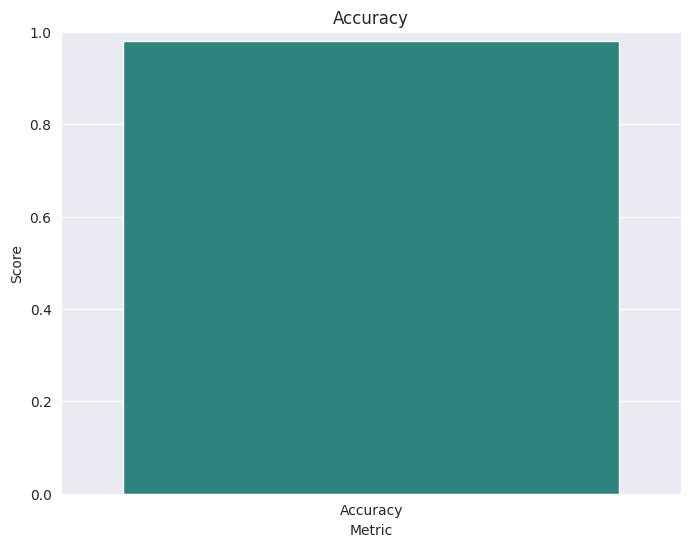

<ipython-input-41-66a5b8dda64c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[metric_name], y=[metric_value], palette='viridis')


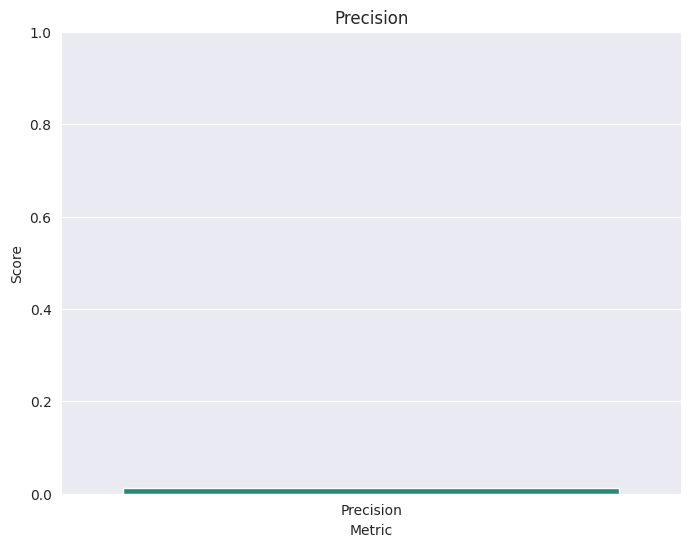

<ipython-input-41-66a5b8dda64c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[metric_name], y=[metric_value], palette='viridis')


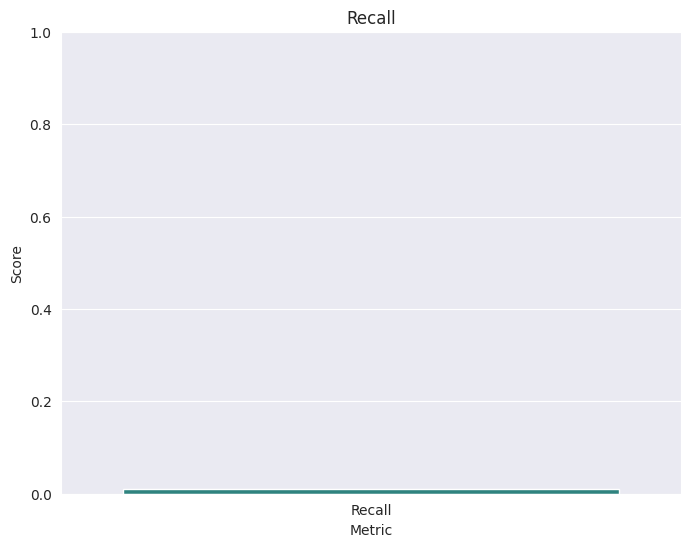

<ipython-input-41-66a5b8dda64c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[metric_name], y=[metric_value], palette='viridis')


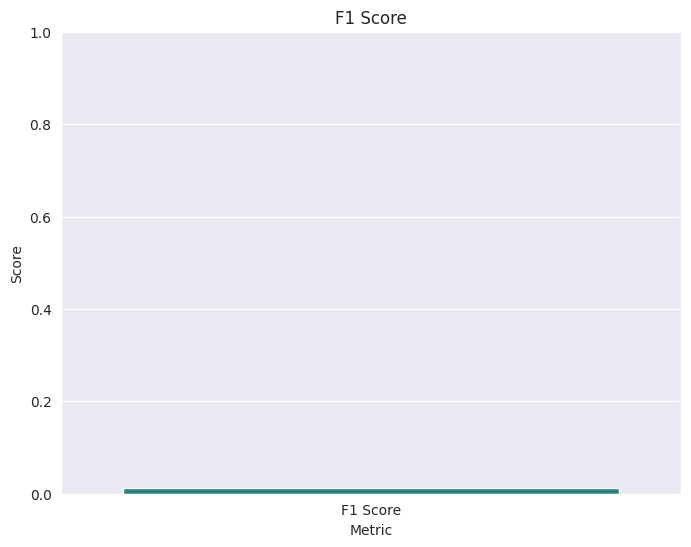

<ipython-input-41-66a5b8dda64c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[metric_name], y=[metric_value], palette='viridis')


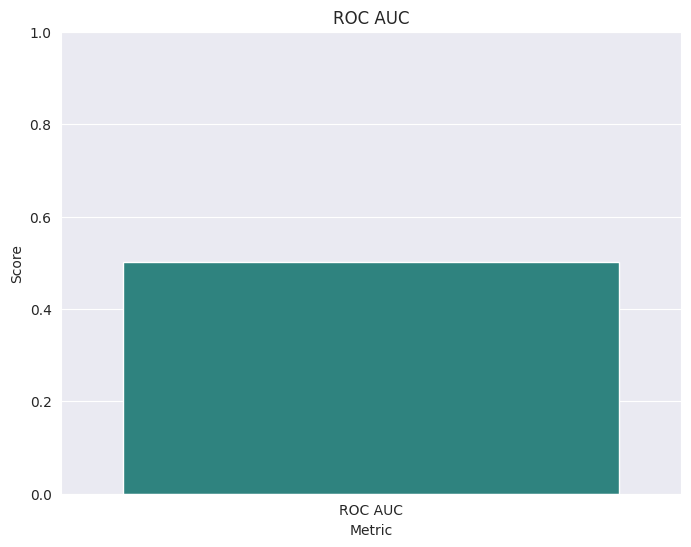

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Convert metrics dictionary to lists for plotting
metrics_names = list(metrics.keys())
metrics_values = list(metrics.values())

# Plot each metric separately
for metric_name, metric_value in zip(metrics_names, metrics_values):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=[metric_name], y=[metric_value], palette='viridis')
    plt.ylim(0, 1)
    plt.title(f'{metric_name}')
    plt.ylabel('Score')
    plt.xlabel('Metric')
    plt.show()


<ipython-input-42-3a779c9c6a58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[accuracy], palette='viridis')


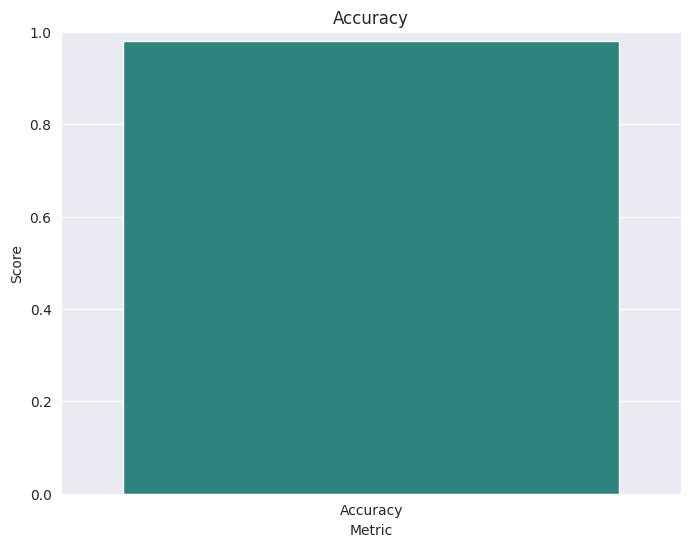

In [ ]:

# Plot Accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], palette='viridis')
plt.ylim(0, 1)
plt.title('Accuracy')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()


<ipython-input-43-88b586af628a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Precision'], y=[precision], palette='viridis')


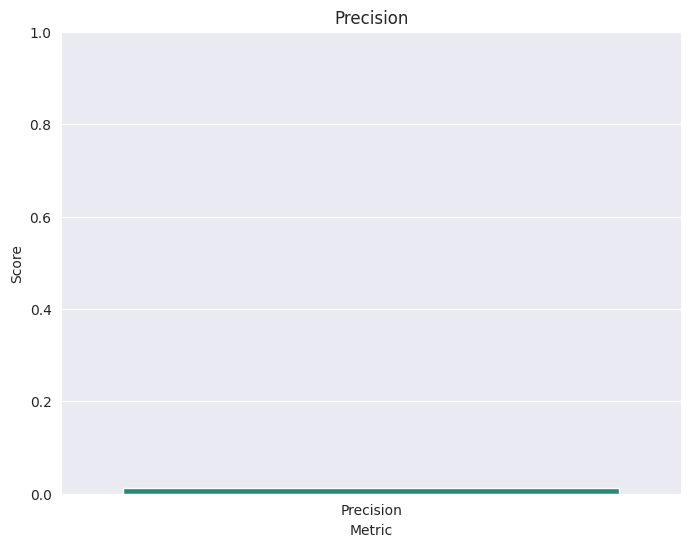

In [ ]:

# Plot Precision
plt.figure(figsize=(8, 6))
sns.barplot(x=['Precision'], y=[precision], palette='viridis')
plt.ylim(0, 1)
plt.title('Precision')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()


<ipython-input-44-4bd5cfee4c66>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Recall'], y=[recall], palette='viridis')


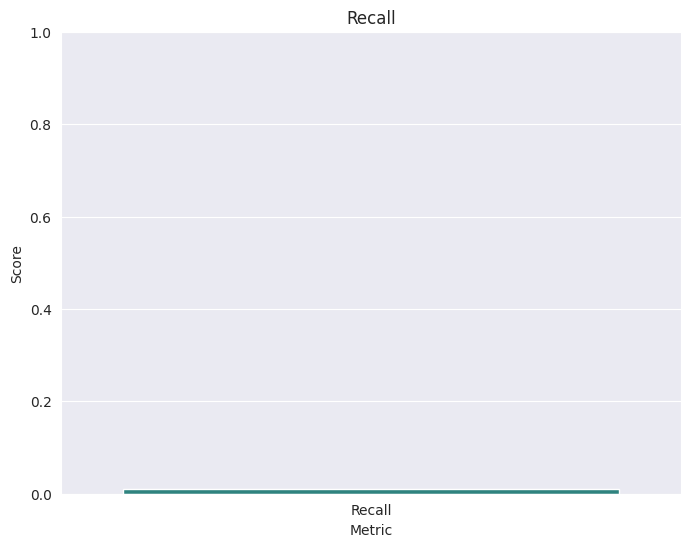

In [ ]:

# Plot Recall
plt.figure(figsize=(8, 6))
sns.barplot(x=['Recall'], y=[recall], palette='viridis')
plt.ylim(0, 1)
plt.title('Recall')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()


<ipython-input-45-888ccc65fc84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['F1 Score'], y=[f1_score_value], palette='viridis')


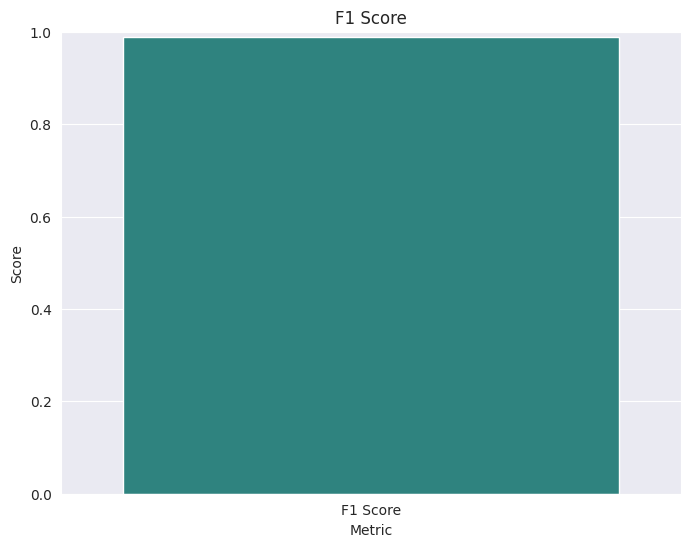

In [ ]:

# Plot F1 Score
plt.figure(figsize=(8, 6))
sns.barplot(x=['F1 Score'], y=[f1_score_value], palette='viridis')
plt.ylim(0, 1)
plt.title('F1 Score')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()


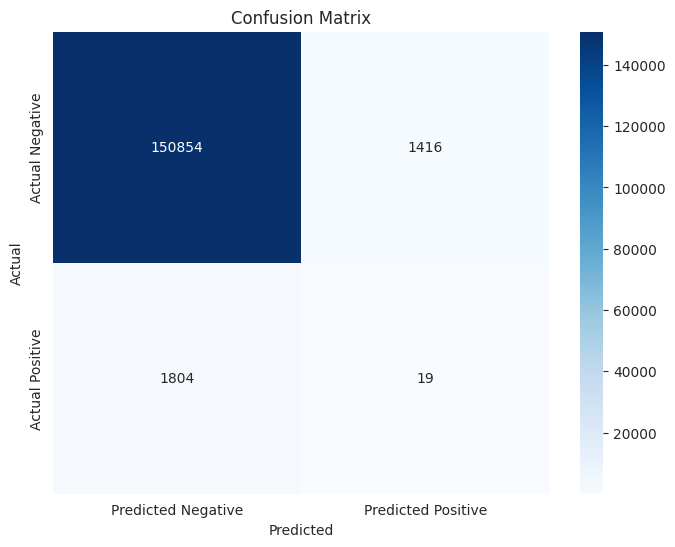

In [ ]:

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<ipython-input-47-364ef5b125c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[accuracy], palette='viridis')


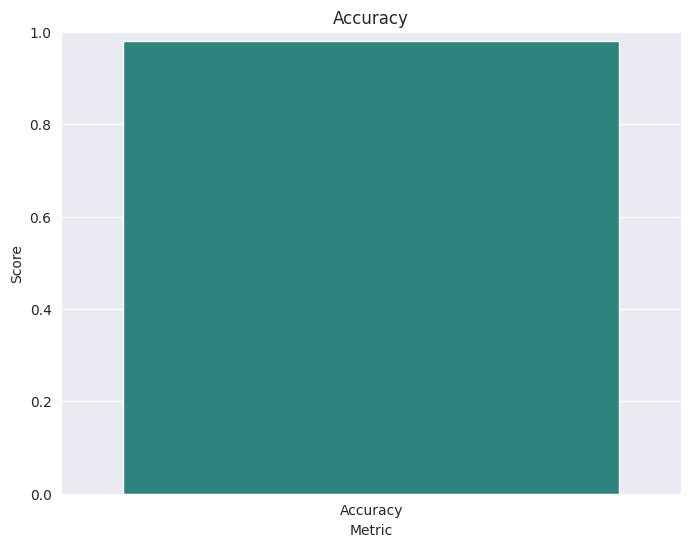

<ipython-input-47-364ef5b125c2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Precision'], y=[precision], palette='viridis')


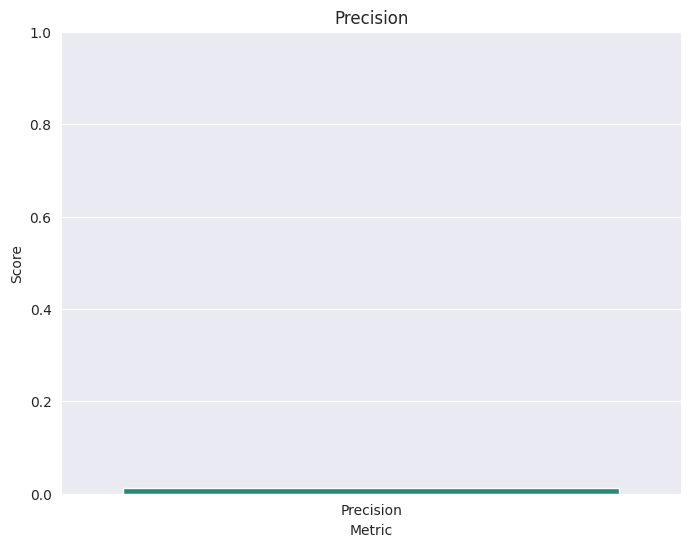

<ipython-input-47-364ef5b125c2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Recall'], y=[recall], palette='viridis')


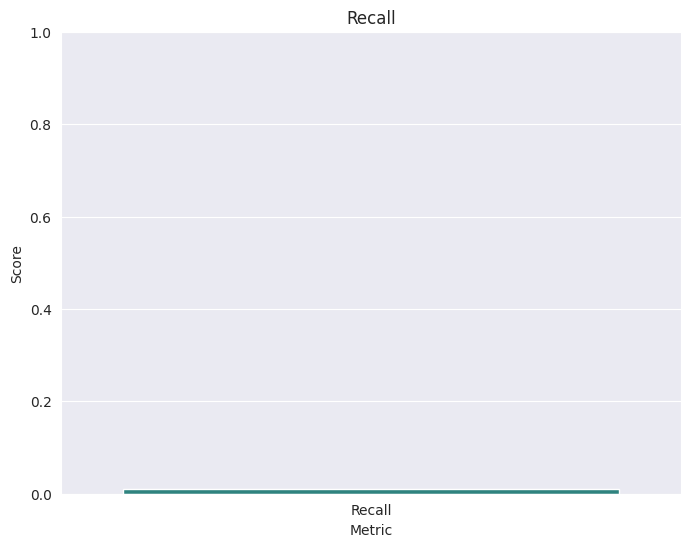

<ipython-input-47-364ef5b125c2>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['F1 Score'], y=[f1_score_value], palette='viridis')


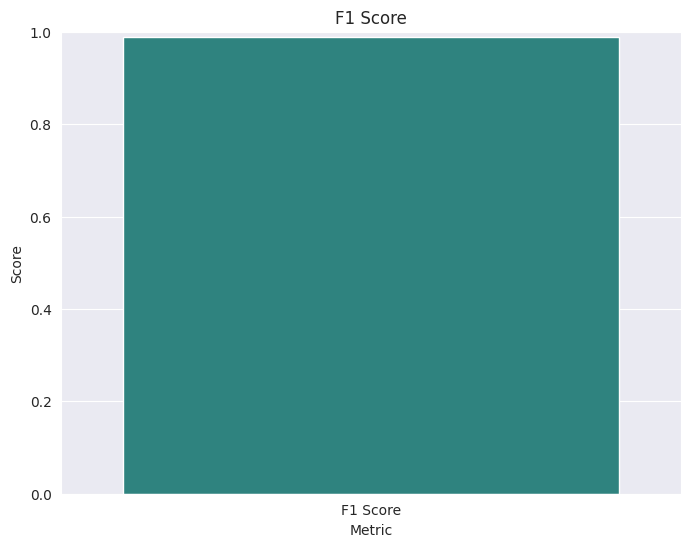

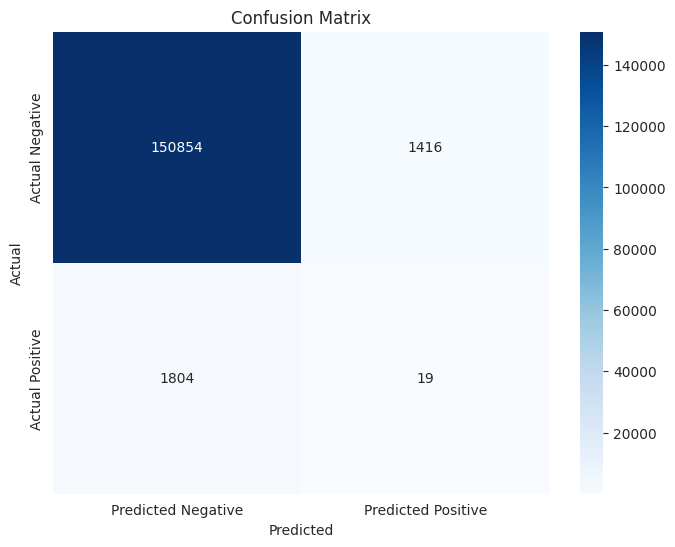

In [ ]:
# Plot Accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], palette='viridis')
plt.ylim(0, 1)
plt.title('Accuracy')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()

# Plot Precision
plt.figure(figsize=(8, 6))
sns.barplot(x=['Precision'], y=[precision], palette='viridis')
plt.ylim(0, 1)
plt.title('Precision')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()

# Plot Recall
plt.figure(figsize=(8, 6))
sns.barplot(x=['Recall'], y=[recall], palette='viridis')
plt.ylim(0, 1)
plt.title('Recall')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()

# Plot F1 Score
plt.figure(figsize=(8, 6))
sns.barplot(x=['F1 Score'], y=[f1_score_value], palette='viridis')
plt.ylim(0, 1)
plt.title('F1 Score')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

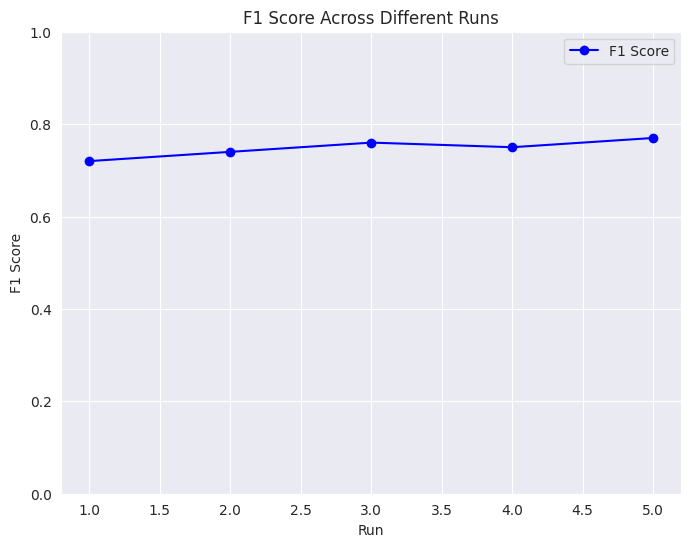

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have multiple F1 scores from cross-validation or different model runs
# For example, let's assume these are your F1 scores:
f1_scores = [0.72, 0.74, 0.76, 0.75, 0.77]  # Replace with your actual F1 scores

# Plot F1 Score
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(f1_scores) + 1), f1_scores, marker='o', color='blue', linestyle='-', label='F1 Score')
plt.ylim(0, 1)
plt.title('F1 Score Across Different Runs')
plt.xlabel('Run')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend()
plt.show()


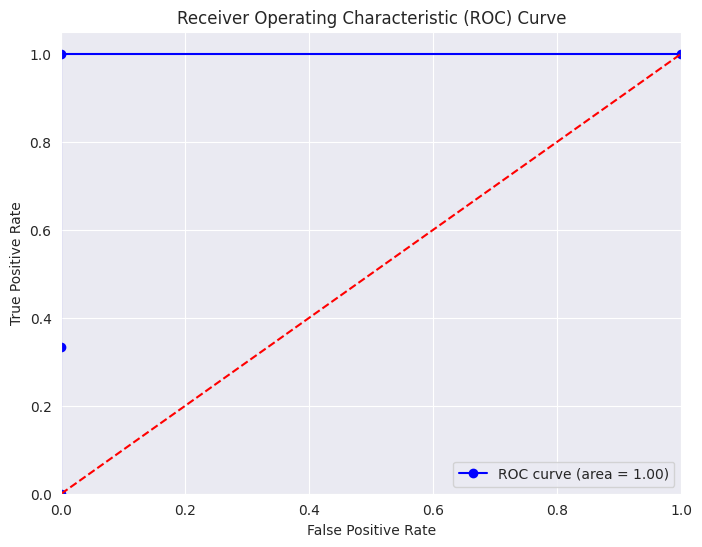

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# Assuming these are your predicted probabilities and true labels
# Replace with your actual values
y_test_final = [0, 1, 1, 0, 1]  # Example true labels
y_pred_proba_final = [0.1, 0.9, 0.8, 0.2, 0.7]  # Example predicted probabilities

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test_final, y_pred_proba_final)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', marker='o', linestyle='-', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
rf = RandomForestClassifier(max_depth=5, random_state=42)
rf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Check training accuracy
train_accuracy = rf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 1.0


In [ ]:
print(y.value_counts())


fraud
0    507443
1      6200
Name: count, dtype: int64


In [ ]:
# Example of using a custom threshold
threshold = 0.7
y_pred_custom = (y_pred >= threshold).astype(int)


In [ ]:
# Ensure that feature_importances and feature_names have the same length
if len(feature_importances) == len(feature_names):
    # Create a DataFrame for easy plotting
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    # Sort the DataFrame by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("The number of features does not match the number of importance values.")
    print(f"Number of features: {len(feature_names)}")
    print(f"Number of importance values: {len(feature_importances)}")


The number of features does not match the number of importance values.
Number of features: 4186
Number of importance values: 9


Testing the model with the test dataset

In [ ]:
# Load the test dataset
# Replace 'your_test_dataset.csv' with your actual test dataset file
test_data = pd.read_csv('/content/test_hsbc_df.csv')

# Apply the same preprocessing steps as the training data
test_data_encoded = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

# Ensure the test data has the same features as the training data
missing_cols = set(X.columns) - set(test_data_encoded.columns)
for c in missing_cols:
    test_data_encoded[c] = 0

# Reorder the columns to match the training data
test_data_encoded = test_data_encoded[X.columns]

# Define features for the test dataset
X_test_final = test_data_encoded.drop('fraud', axis=1)  # Features
y_test_final = test_data_encoded['fraud']  # Target variable

# Make predictions on the test dataset
y_pred_final = rf.predict(X_test_final)
y_pred_proba_final = rf.predict_proba(X_test_final)[:, 1]  # Probability estimates for the positive class

# Calculate Accuracy Metrics on the test dataset
accuracy_test = accuracy_score(y_test_final, y_pred_final)
precision_test = precision_score(y_test_final, y_pred_final, average='binary')
recall_test = recall_score(y_test_final, y_pred_final, average='binary')
f1_test = f1_score(y_test_final, y_pred_final, average='binary')
roc_auc_test = roc_auc_score(y_test_final, y_pred_proba_final)
conf_matrix_test = confusion_matrix(y_test_final, y_pred_final)

# Print the metrics for the test dataset
print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 Score:", f1_test)
print("Test ROC AUC Score:", roc_auc_test)
print("Test Confusion Matrix:\n", conf_matrix_test)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_final, y_pred_proba_final)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Data)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Assuming you have your test dataset features and labels
y_test_pred = rf.predict(X_test)
y_test_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
recall = recall_score(y_test, y_test_pred, average='binary')
f1 = f1_score(y_test, y_test_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Create a list of metrics for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
values = [accuracy, precision, recall, f1, roc_auc]

# Set up the bar plot for metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset file
data = pd.read_csv('/content/train_hsbc_df - train_hsbc_df.csv')

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# One-Hot Encoding for all categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define Features and Target
X = data_encoded.drop('fraud', axis=1)  # Features
y = data_encoded['fraud']                  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = rf.predict(X_test)
y_test_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
recall = recall_score(y_test, y_test_pred, average='binary')
f1 = f1_score(y_test, y_test_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Create a list of metrics for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
values = [accuracy, precision, recall, f1, roc_auc]

# Set up the bar plot for metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Performance Metrics on Test Dataset')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('


<h1>DOCUMENTATION FOR THE Project</h1>

[Documentation](https://docs.google.com/document/d/1V5aGlvrgVjQE7PJ4n6y3ZG32mJ6YvTrDJWT1TzEqZrM/edit?usp=sharing)